# Importing Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [132]:
data = pd.read_csv('/content/loan_data_set.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Exploration

In [133]:
# Loan_ID

data.Loan_ID.value_counts(dropna = False)

,count
Loan_ID,
LP002990,1
LP001002,1
LP001003,1
LP001005,1
LP001006,1
...,...
LP001024,1
LP001020,1
LP001018,1


In [134]:
# Gender

data.Gender.value_counts(dropna = False)

,count
Gender,
Male,489
Female,112
NaN,13


<Axes: xlabel='Loan_ID', ylabel='count'>

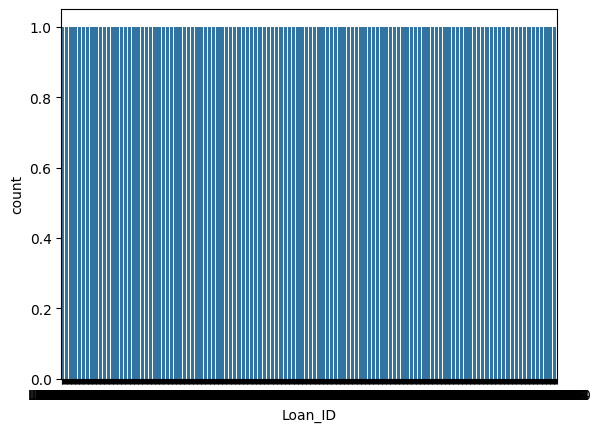

In [135]:
# Categorical columns : Married, education, self employed, property, loan status, loan amount term

# Exploring the categorical columns/features

# Loan_ID

sns.countplot(x = 'Loan_ID',data = data)

<Axes: xlabel='Gender', ylabel='count'>

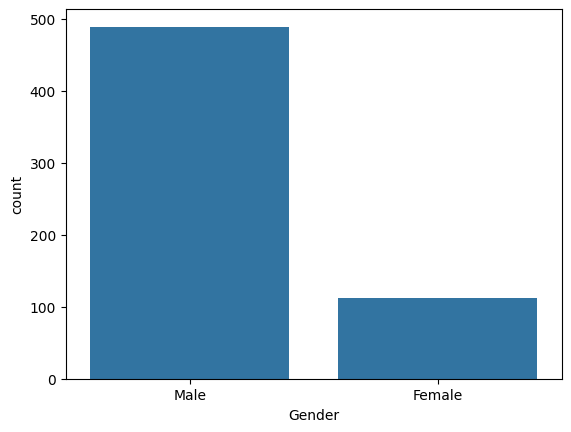

In [136]:
# Gender

sns.countplot(x = 'Gender',data = data)  # Insight: the number of male applicants is really high compared to females

<Axes: xlabel='Married', ylabel='count'>

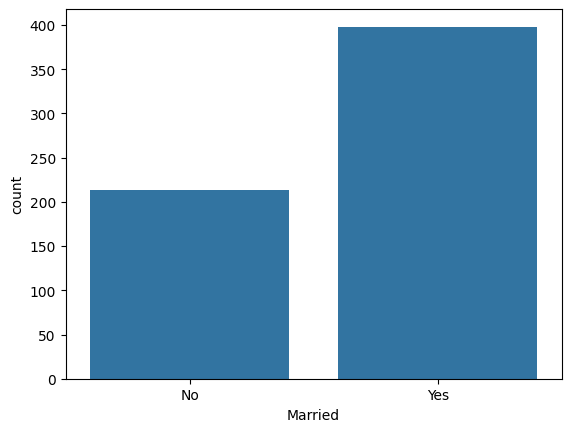

In [137]:
# Married

sns.countplot(x = 'Married',data = data)

<Axes: xlabel='Dependents', ylabel='count'>

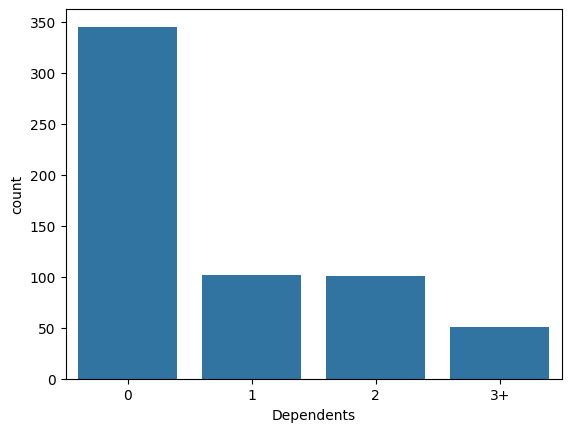

In [138]:
# Dependents

sns.countplot(x = 'Dependents',data = data)

<Axes: xlabel='Education', ylabel='count'>

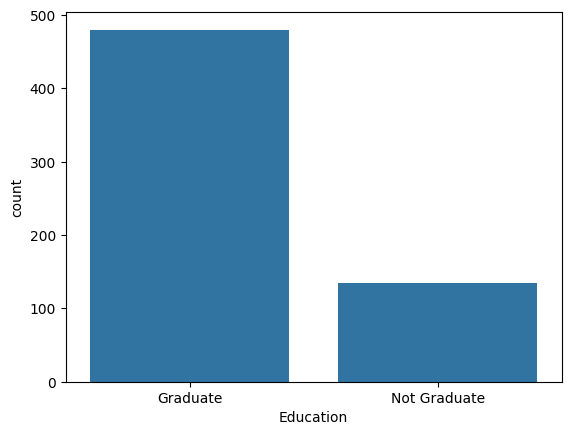

In [141]:
# Education

sns.countplot(x = 'Education',data = data)

<Axes: xlabel='Self_Employed', ylabel='count'>

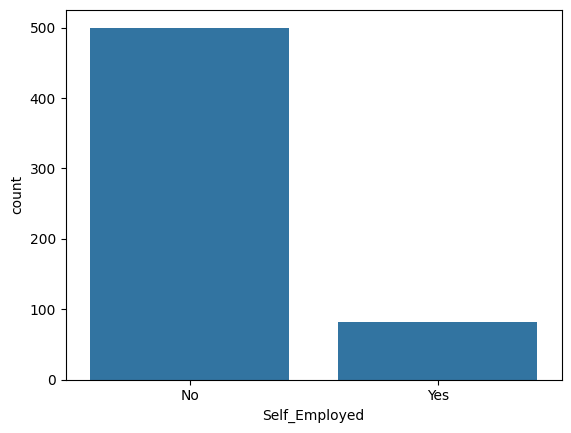

In [142]:
# Self_Employed

sns.countplot(x = 'Self_Employed',data = data)

<Axes: xlabel='ApplicantIncome', ylabel='count'>

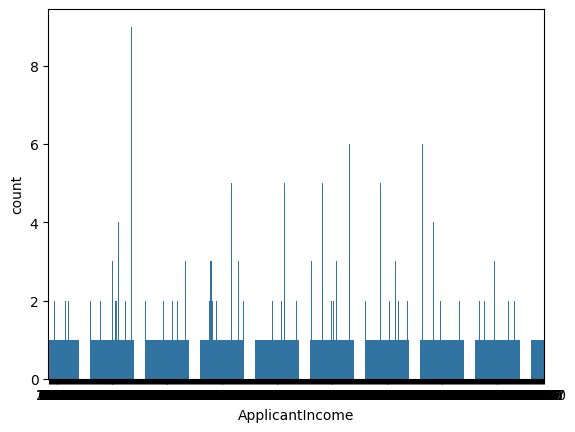

In [143]:
# ApplicantIncome

sns.countplot(x = 'ApplicantIncome',data = data)

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

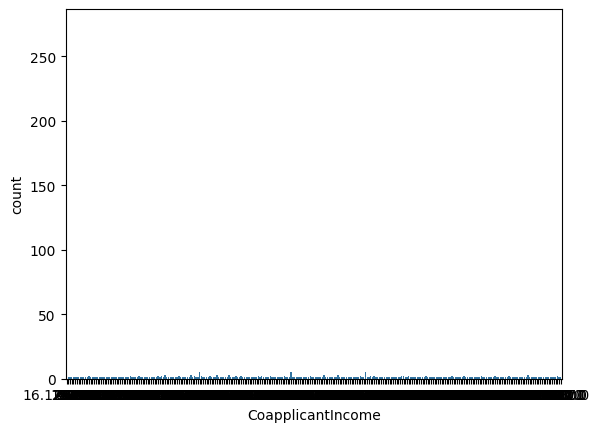

In [144]:
# CoapplicantIncome

sns.countplot(x = 'CoapplicantIncome',data = data)

<Axes: xlabel='LoanAmount', ylabel='count'>

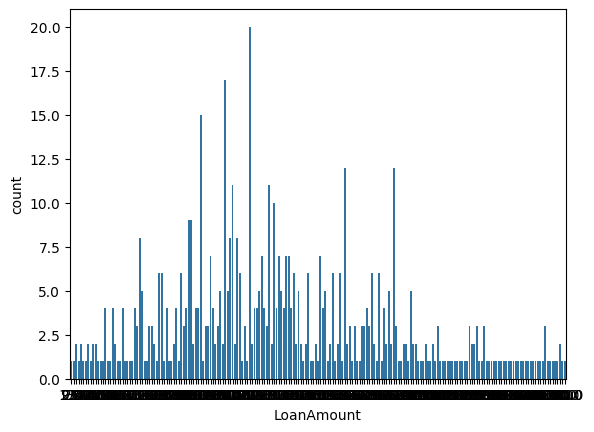

In [145]:
# LoanAmount

sns.countplot(x = 'LoanAmount',data = data)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

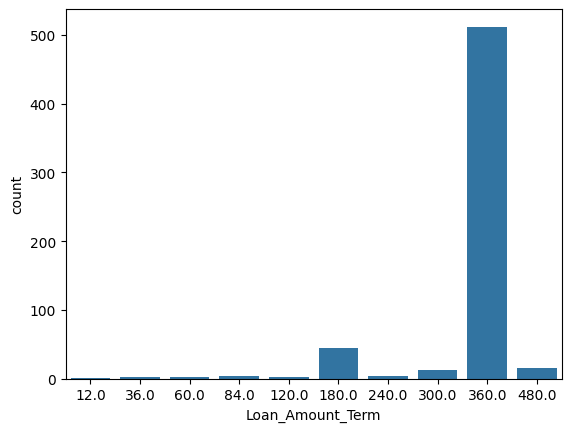

In [146]:
# Loan_Amount_Term

sns.countplot(x = 'Loan_Amount_Term',data = data)

<Axes: xlabel='Credit_History', ylabel='count'>

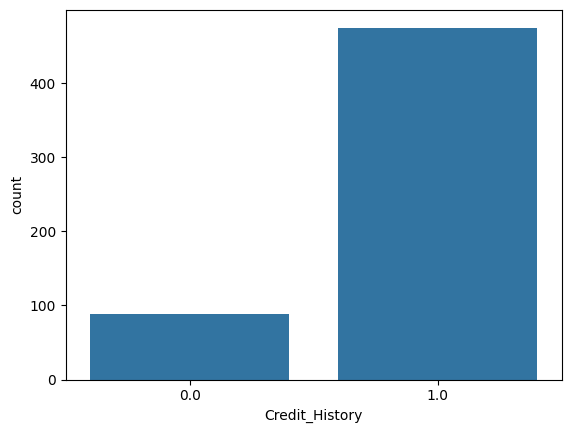

In [147]:
# Credit_History

sns.countplot(x = 'Credit_History',data = data)

<Axes: xlabel='Property_Area', ylabel='count'>

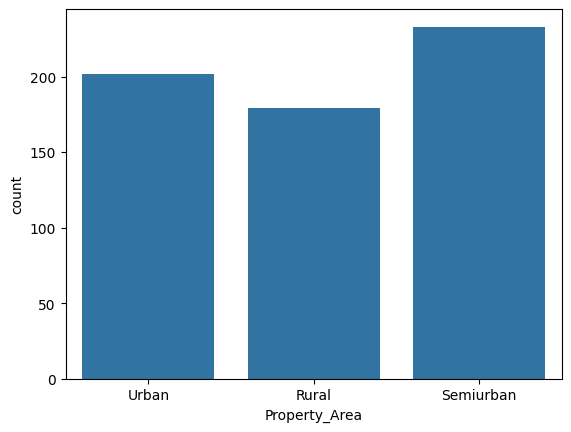

In [148]:
# Property_Area

sns.countplot(x = 'Property_Area',data = data)

/tmp/ipython-input-3801766386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Status',data = data, palette = 'cubehelix')


<Axes: xlabel='Loan_Status', ylabel='count'>

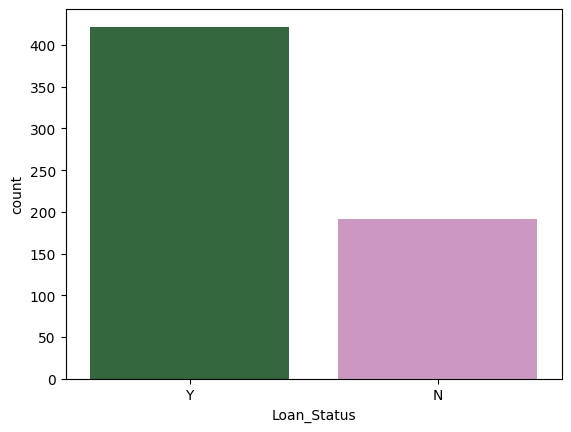

In [149]:
# Loan_Status

sns.countplot(x = 'Loan_Status',data = data, palette = 'cubehelix')

# Approval percentages

In [150]:
# If i want to see the percentage of loans approved and not approved

count_app = len(data[data.Loan_Status == 'Y'])

count_not_app = len(data[data.Loan_Status == 'N'])

count_null = len(data[data.Loan_Status.isnull()])

total_count = len(data.Loan_Status)

print("Percent of loans aproved: {:.2f}%".format((count_app/(len(data.Loan_Status))*100)))
print("Percent of loans not aproved: {:.2f}%".format((count_not_app/(len(data.Loan_Status))*100)))
print("Percent of null values: {:.2f}%".format((count_null/(len(data.Loan_Status))*100)))

''' Number of loans approved are higher than rejected and also there are no null values in the column'''

Percent of loans aproved: 68.73%
Percent of loans not aproved: 31.27%
Percent of null values: 0.00%


' Number of loans approved are higher than rejected and also there are no null values in the column'

# Numerical Data Exploration

In [151]:
# Exploring Numerical columns:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [152]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

data[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

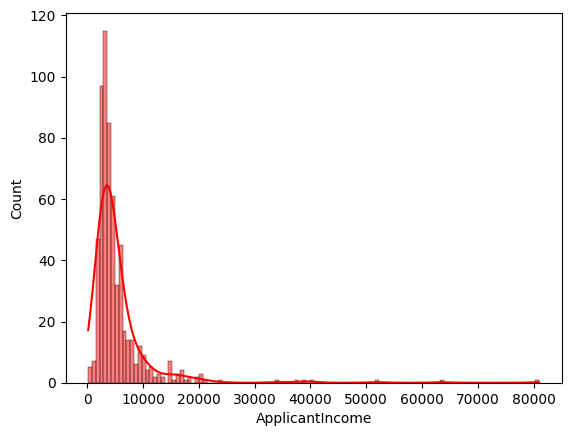

In [153]:
# Check the distribution of all of these numerical features

# Histogram of ApplicantIncome

sns.histplot(data = data,x = 'ApplicantIncome',kde = True, color = 'red')

<Axes: xlabel='LoanAmount', ylabel='Count'>

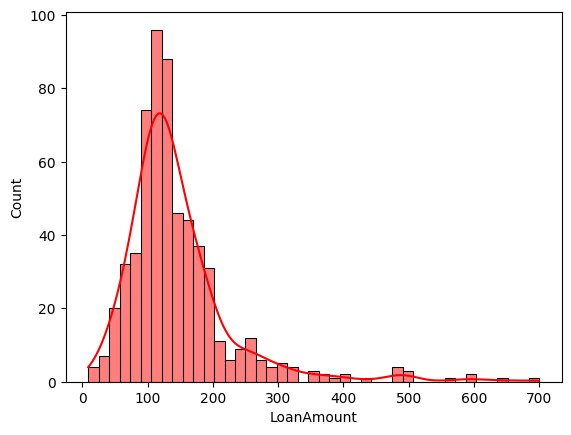

In [154]:
# Loan_Amount

sns.histplot(data = data,x = 'LoanAmount',kde = True, color = 'red')

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

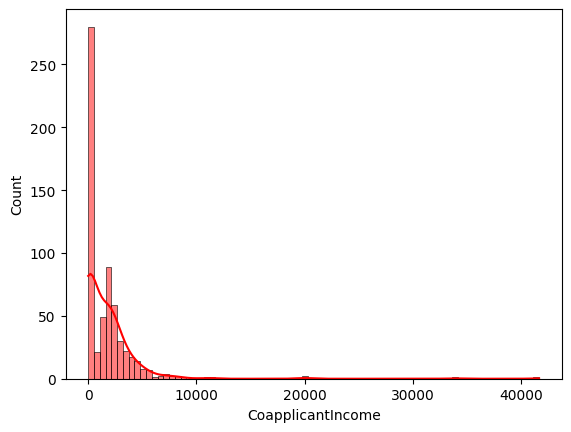

In [155]:
# CoapplicantIncome

sns.histplot(data = data,x = 'CoapplicantIncome',kde = True, color = 'red')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

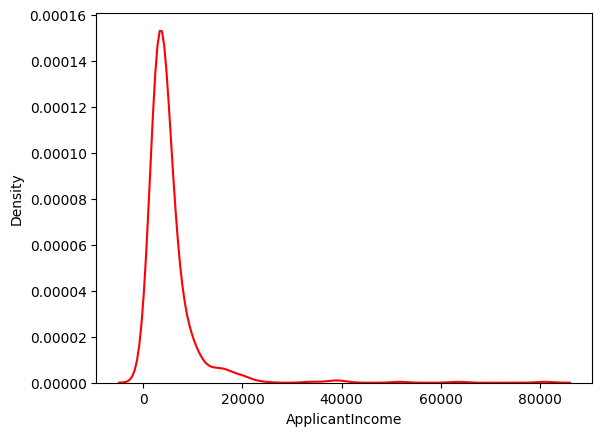

In [156]:
# ApplicantIncome

sns.kdeplot(x = data['ApplicantIncome'],color = 'r')

<Axes: xlabel='LoanAmount', ylabel='Density'>

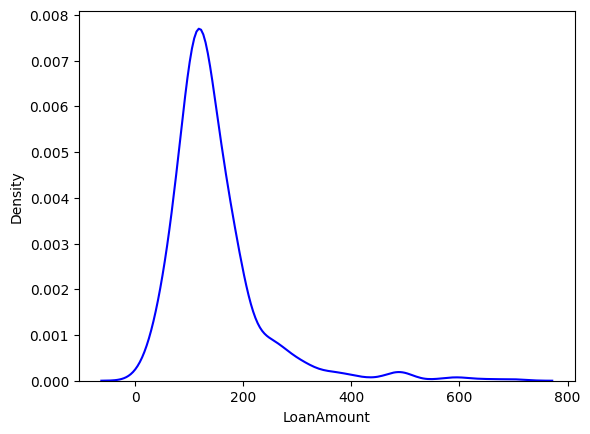

In [157]:
# LoanAmount

sns.kdeplot(x = data['LoanAmount'],color = 'b')

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

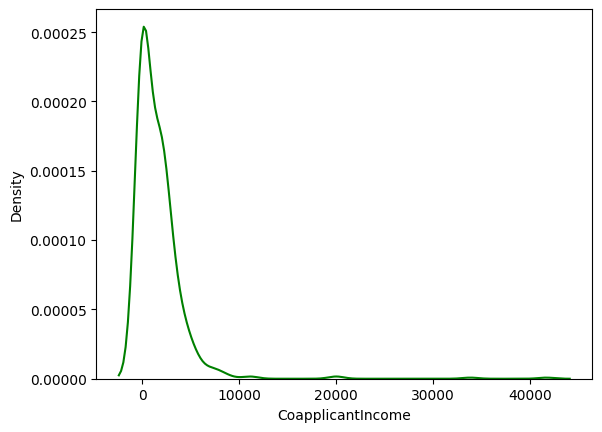

In [158]:
# CoapplicationIncome

sns.kdeplot(x = data['CoapplicantIncome'],color = 'g')

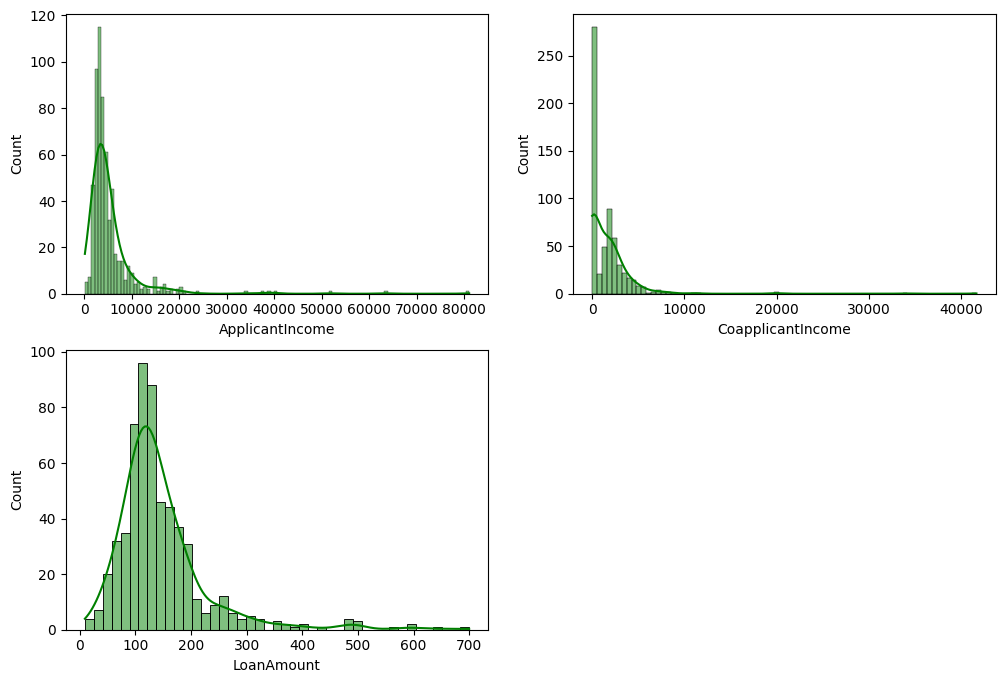

In [159]:
# We create the histogram for all the numerical features together

# All the graphs together

# for loop and subplot

plt.figure(figsize = (12,8))

for i in range(0,len(numerical_features)):
  plt.subplot(2,2,i+1)
  sns.histplot(data = data,x = data[numerical_features[i]],kde = True, color = 'green')

# Univariate analysis
- When we find the distribution of single independent variables

# Violin plots (outliers view)

<Axes: ylabel='ApplicantIncome'>

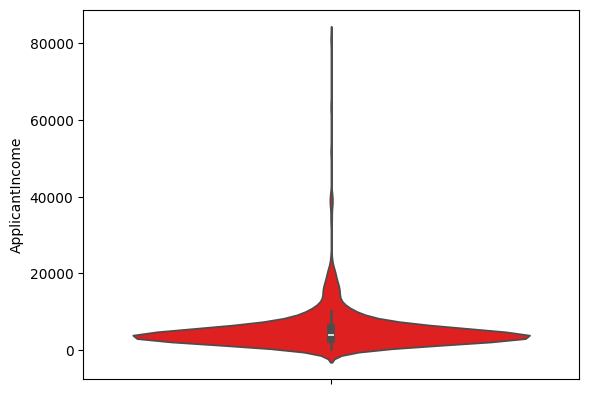

In [160]:
# ApplicantIncome

sns.violinplot(data = data, y = 'ApplicantIncome', color = 'red')

<Axes: ylabel='CoapplicantIncome'>

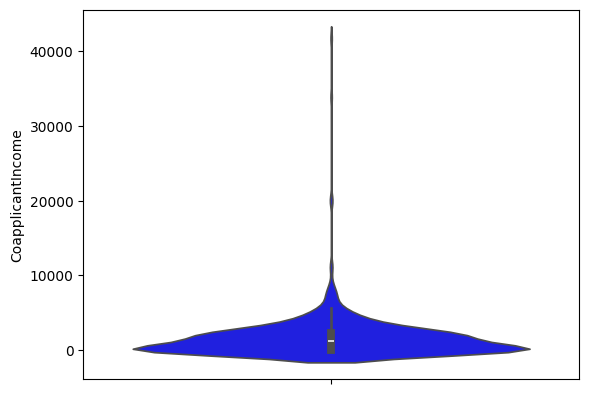

In [161]:
# CoapplicationIncome

sns.violinplot(data = data, y = 'CoapplicantIncome', color = 'blue')

<Axes: ylabel='LoanAmount'>

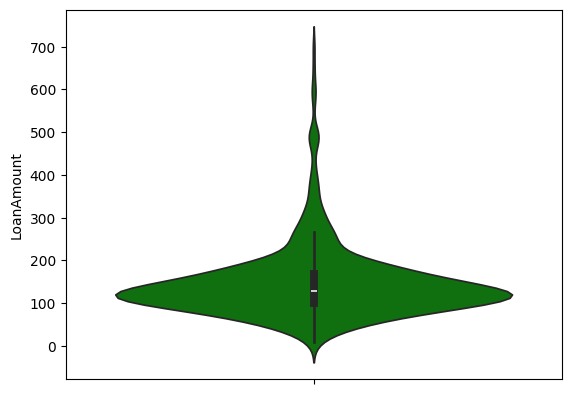

In [162]:
# LoanAmount

sns.violinplot(data = data, y = 'LoanAmount', color = 'green')

# Bi-variate analysis

- Relationship between two variables:

  - a. Sometimes we check the relationship between Target and independent variable.
  
  - b. we check the relationship between two independent variables.

# Bivariate (categorical ↔ categorical)

<Axes: xlabel='Gender'>

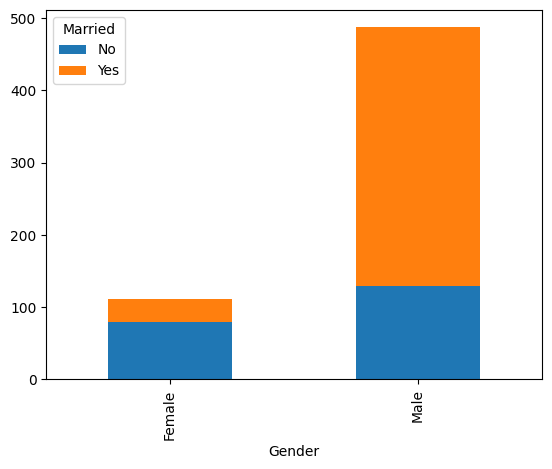

In [163]:
# Bi-variate:

# Categorical variables

# Married and Gender

pd.crosstab(data.Gender,data.Married).plot(kind = 'bar', stacked = True)

<Axes: xlabel='Self_Employed'>

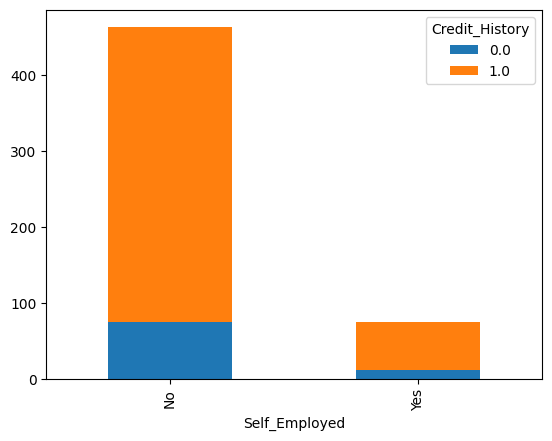

In [164]:
# Self_Employed and Credit_History

pd.crosstab(data.Self_Employed,data.Credit_History).plot(kind = 'bar', stacked = True)

In [141]:
# EDA - Exploratory data analysis

# Insights from the charts
# Identifying outiers , distribution

# Categorical ↔ Numerical

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

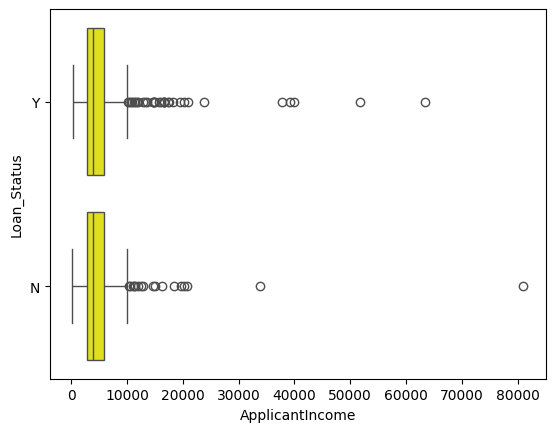

In [165]:
# Relationship between categorical and numerical variables

# Loan_Status and ApplicantIncome

sns.boxplot(x = 'ApplicantIncome', y= 'Loan_Status', data = data, color = 'yellow')

# Numerical ↔ Numerical

Pearson correlation coefficient is 0.5709090389885666


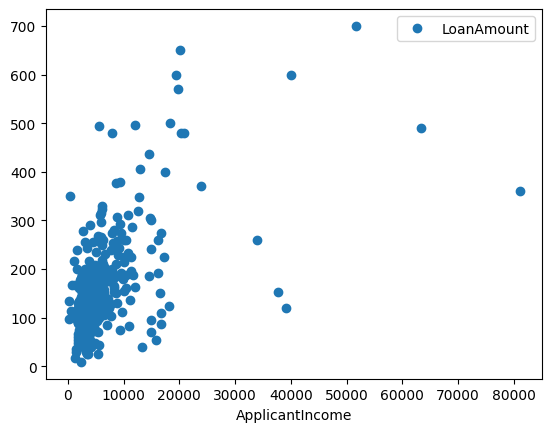

In [166]:
# Numerical to Numerical Relationship

# ApplicantIncome and LoanAmount

data.plot(x = 'ApplicantIncome', y = 'LoanAmount', style = 'o')

print("Pearson correlation coefficient is", data['ApplicantIncome'].corr(data['LoanAmount']))

# Multivariate analysis

<Axes: >

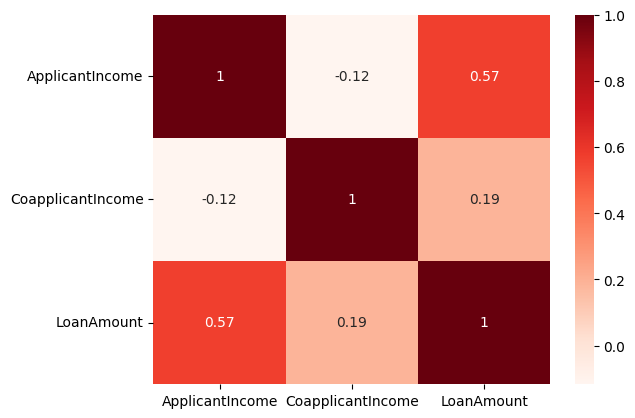

In [167]:
# Multivariate analysis

# Relationship between all the variables together

numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

sns.heatmap(data[numerical_features].corr(), annot = True, cmap='Reds')

# Missing values

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [169]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [170]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Impute missing values

In [171]:
# Data Preprocessing:

# Categorical columns - replace with mode

# Numerical columns - replace it with mean

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)

data['Married'].fillna(data['Married'].mode()[0], inplace = True)

data['Self_Employed'].fillna(data['Dependents'].mode()[0], inplace = True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

data['Property_Area'].fillna(data['Property_Area'].mode()[0], inplace = True)

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

/tmp/ipython-input-401141925.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
/tmp/ipython-input-401141925.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [172]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# One-hot encoding + target cleanup

In [173]:
# One hot encoding
# when we transform our categorical columns into numerical columns, we call it one hot encoding

model_data = data.copy()

model_data = model_data.drop(['Loan_ID'], axis = 1)
model_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [174]:
model_data = pd.get_dummies(model_data, dtype = int)
model_data.rename(columns = {'Loan_Status_Y':'Loan_Status'}, inplace = True)

model_data.drop(['Loan_Status_N'], axis = 1, inplace = True)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1


# Outlier handling (IQR) — current code problem

In [175]:
# Removing outliers

ApplicantIncome_percentile_25 = model_data['ApplicantIncome'].quantile(0.25)
ApplicantIncome_percentile_75 = model_data['ApplicantIncome'].quantile(0.75)

IQR = ApplicantIncome_percentile_75 - ApplicantIncome_percentile_25

model_data['ApplicantIncome'] = model_data['ApplicantIncome'][~(model_data['ApplicantIncome']< (ApplicantIncome_percentile_25 - 1.5* IQR))|(model_data['ApplicantIncome'] > (ApplicantIncome_percentile_75 + 1.5* IQR))]

# print(ApplicantIncome_percentile_25,ApplicantIncome_percentile_75)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1


In [176]:
CoapplicantIncome_percentile_25 = model_data['CoapplicantIncome'].quantile(0.25)
CoapplicantIncome_percentile_75 = model_data['CoapplicantIncome'].quantile(0.75)

IQR = CoapplicantIncome_percentile_75 - CoapplicantIncome_percentile_25

model_data['CoapplicantIncome'] = model_data['CoapplicantIncome'][~(model_data['CoapplicantIncome']< (CoapplicantIncome_percentile_25 - 1.5* IQR))|(model_data['CoapplicantIncome'] > (CoapplicantIncome_percentile_75 + 1.5* IQR))]

# print(CoapplicantIncome_percentile_25,CoapplicantIncome_percentile_75)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1


In [177]:
LoanAmount_percentile_25 = model_data['LoanAmount'].quantile(0.25)
LoanAmount_percentile_75 = model_data['LoanAmount'].quantile(0.75)

IQR = LoanAmount_percentile_75 - LoanAmount_percentile_25

model_data['LoanAmount'] = model_data['LoanAmount'][~(model_data['LoanAmount']< (LoanAmount_percentile_25 - 1.5* IQR))|(model_data['LoanAmount'] > (LoanAmount_percentile_75 + 1.5* IQR))]

# print(LoanAmount_percentile_25,LoanAmount_percentile_75)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1


# Transformations (reduce skew)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

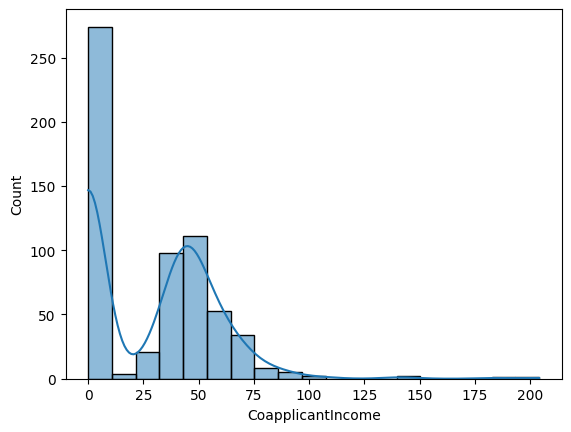

In [178]:
model_data.CoapplicantIncome = np.sqrt(model_data.CoapplicantIncome)

sns.histplot(data = model_data, x = 'CoapplicantIncome', kde = True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

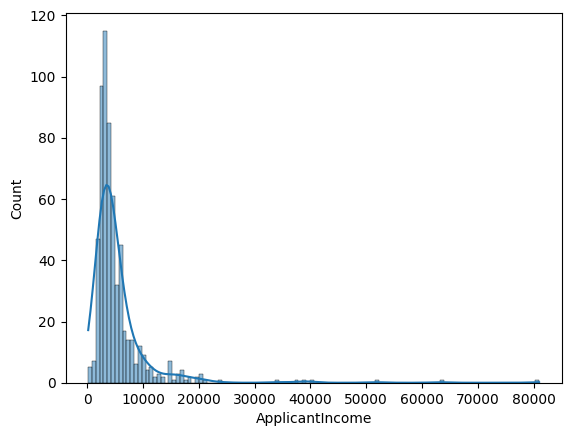

In [179]:
sns.histplot(data = model_data, x = 'ApplicantIncome', kde = True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

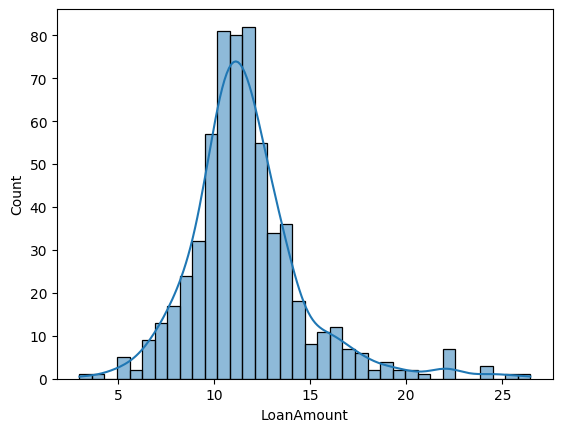

In [180]:
model_data.LoanAmount = np.sqrt(model_data.LoanAmount)

sns.histplot(data = model_data, x = 'LoanAmount', kde = True)

# Features/Target split + class balance

In [181]:
x = model_data.drop(['Loan_Status'], axis =1)

y = model_data['Loan_Status']

x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.000000,12.100089,360.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,4583,38.832976,11.313708,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.000000,8.124038,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
3,2583,48.559242,10.954451,360.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.000000,11.874342,360.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.000000,8.426150,360.0,1.0,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
610,4106,0.000000,6.324555,180.0,1.0,0,1,0,1,0,...,0,1,1,0,0,1,0,1,0,0
611,8072,15.491933,15.905974,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
612,7583,0.000000,13.674794,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1


In [182]:
x,y = SMOTE().fit_resample(x,y)

<Axes: xlabel='count', ylabel='Loan_Status'>

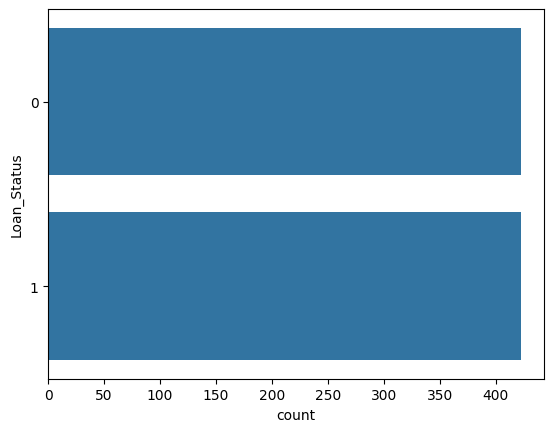

In [183]:
sns.countplot(y = y, data = model_data)

In [184]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.000000,12.100089,360.000000,1.000000,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,4583,38.832976,11.313708,360.000000,1.000000,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.000000,8.124038,360.000000,1.000000,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
3,2583,48.559242,10.954451,360.000000,1.000000,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.000000,11.874342,360.000000,1.000000,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,3537,14.635930,9.557772,180.000000,0.775916,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
840,2758,9.704074,9.476240,314.827338,1.000000,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
841,2988,5.204772,9.459785,375.301904,0.000000,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
842,2626,39.822346,10.856521,180.000000,0.188330,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


# Scaling

In [185]:
x = MinMaxScaler().fit_transform(x)
x

array([[0.07048856, 0.        , 0.38793922, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.19024119, 0.3544156 , ..., 1.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.21843912, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03510204, 0.02549797, 0.27538236, ..., 0.        , 0.        ,
        0.        ],
       [0.03062461, 0.19508808, 0.33492558, ..., 0.        , 0.        ,
        0.        ],
       [0.04166976, 0.        , 0.25338533, ..., 0.        , 0.        ,
        0.        ]])

In [186]:
x

array([[0.07048856, 0.        , 0.38793922, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.19024119, 0.3544156 , ..., 1.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.21843912, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03510204, 0.02549797, 0.27538236, ..., 0.        , 0.        ,
        0.        ],
       [0.03062461, 0.19508808, 0.33492558, ..., 0.        , 0.        ,
        0.        ],
       [0.04166976, 0.        , 0.25338533, ..., 0.        , 0.        ,
        0.        ]])

# Train - test split

In [187]:
# Splitting the data into train and test

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

# Logistic Regression

In [188]:
# Modelling

# 1. training (80%)
# 2. testing  (20%)

# Logistic regression - Classification alogorithm

In [189]:
classifier = LogisticRegression(solver= 'saga', max_iter= 500, random_state = 1)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81        86
           1       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.87      0.84      0.83       169
weighted avg       0.87      0.83      0.83       169

[[59 27]
 [ 1 82]]


# KNN (choose k)

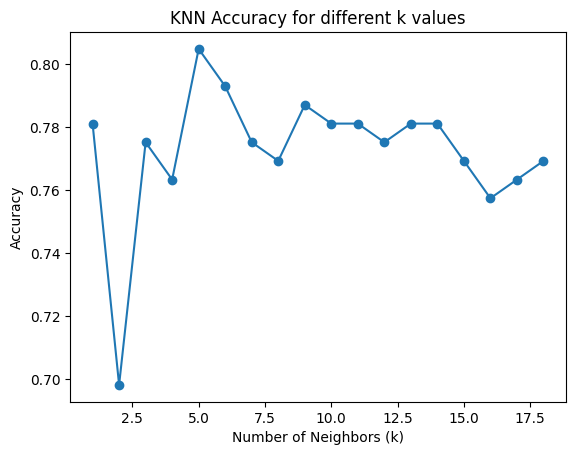

KNN's model has the highest accuracy of: 80.47%


In [190]:
# KNN Hyperparameter Tuning

# KNN K nearest neighbor

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

score = []
for i in range(1, 19):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(x_train, y_train)
    score.append(KNclassifier.score(x_test, y_test))

plt.plot(range(1, 19), score, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different k values")
plt.show()

max_acc = max(score)
print("KNN's model has the highest accuracy of: {:.2f}%".format(max_acc*100))

# Support Vector Machine (SVM)

In [191]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf')   # you can try 'linear', 'poly', 'sigmoid'
svm_clf.fit(x_train, y_train)
svm_acc = svm_clf.score(x_test, y_test)
print("SVM model accuracy: {:.2f}%".format(svm_acc*100))

SVM model accuracy: 83.43%


# Gaussian Naive Bayes

In [192]:
# Gaussian Naïve Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nb_acc = nb_clf.score(x_test, y_test)
print("Gaussian Naïve Bayes model accuracy: {:.2f}%".format(nb_acc*100))

Gaussian Naïve Bayes model accuracy: 82.84%


## Decision Tree

In [193]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)
dt_acc = dt_clf.score(x_test, y_test)
print("Decision Tree model accuracy: {:.2f}%".format(dt_acc*100))

Decision Tree model accuracy: 76.92%


## Random Forest

In [194]:
# Random Forest (Bagging)

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
rf_acc = rf_clf.score(x_test, y_test)
print("Random Forest model accuracy: {:.2f}%".format(rf_acc*100))

Random Forest model accuracy: 82.84%


## Model Comparison

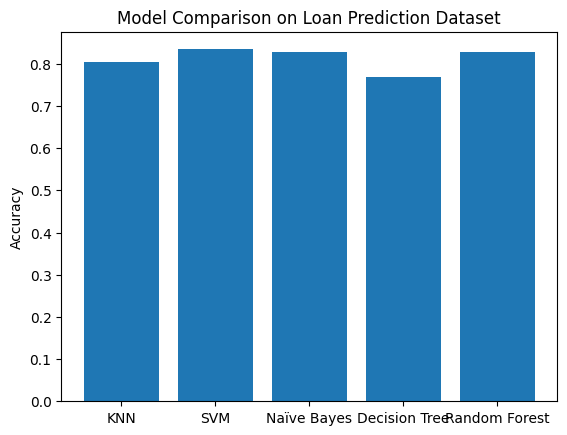

In [195]:
# Model Comparison

models = ["KNN", "SVM", "Naïve Bayes", "Decision Tree", "Random Forest"]
accuracies = [max_acc, svm_acc, nb_acc, dt_acc, rf_acc]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison on Loan Prediction Dataset")
plt.show()

In [196]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Outlier removal function

In [198]:
def removing_outliers(df):
  for column in df.select_dtype(include = np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    low_threshold = Q1 - 1.5*IQR
    high_threshold = Q3 + 1.5*IQR
    df = df[(df[column]>= low_threshold)&(df[column]<= high_threshold)]

  return df